# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/.

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [40]:
#load the required packages
%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [41]:
#helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g. train/test split). If you change the ID number explain here why you have changed it.

In [42]:
ID = 2082157
np.random.seed(ID)

Now we load the dataset using the function above.

In [43]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
#rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [44]:
#random permute the data and split into training and test taking the first 500 data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset:", labels)
print("Frequencies in training dataset:", freqs)

Labels in training dataset: [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset: [52 43 46 58 34 64 60 48 53 42]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [45]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28, 28),
        cmap = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


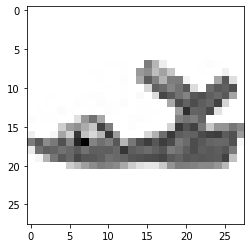

LABEL: 5
INPUT:


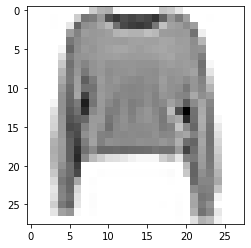

LABEL: 2
INPUT:


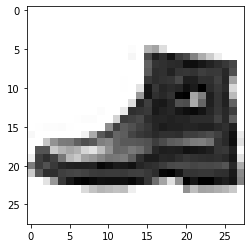

LABEL: 9


In [46]:
#let's try the plotting function
plot_input(X_train, y_train, 10)
plot_input(X_test, y_test, 50)
plot_input(X_test, y_test, 300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [47]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons
hl_parameters_500 = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#MPLClassifier model definition (m_training = 500): default activation function = ReLu
mlp_classifier_500 = MLPClassifier(hl_parameters_500, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID)

#find best model using 5-fold CV and train it using all the training data
mlp_cv = GridSearchCV(mlp_classifier_500, hl_parameters_500, cv=5, return_train_score=False)

#fit the grid search with training data
mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.32777471
Iteration 2, loss = 2.17316215
Iteration 3, loss = 2.02401117
Iteration 4, loss = 1.86680942
Iteration 5, loss = 1.70154171
Iteration 6, loss = 1.49444216
Iteration 7, loss = 1.35672469
Iteration 8, loss = 1.30989955
Iteration 9, loss = 1.03556787
Iteration 10, loss = 0.99275043
Iteration 11, loss = 0.97195151
Iteration 12, loss = 0.78254896
Iteration 13, loss = 0.76782784
Iteration 14, loss = 0.78115537
Iteration 15, loss = 0.76178625
Iteration 16, loss = 0.69344369
Iteration 17, loss = 0.61003288
Iteration 18, loss = 0.66234546
Iteration 19, loss = 0.56591744
Iteration 20, loss = 0.60732606
Iteration 21, loss = 0.47960518
Iteration 22, loss = 0.43269299
Iteration 23, loss = 0.45132729
Iteration 24, loss = 0.47644375
Iteration 25, loss = 0.55576308
Iteration 26, loss = 0.44747095
Iteration 27, loss = 0.46521609
Iteration 28, loss = 0.33587867
Iteration 29, loss = 0.40025748
Iteration 30, loss = 0.65923644
Iteration 31, loss = 0.35593686
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes={'hidden_layer_sizes': [(10,),
                                                                                (50,),
                                                                                (10,
                                                                                 10),
                                                                                (50,
                                                                                 50)]},
                                     learning_rate_init=0.1, max_iter=300,
                                     random_state=2082157, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [48]:
#best MPL classifier (m_training = 500): best_estimator_
best_mlp_classifier = mlp_cv.best_estimator_
print("Best MLP classifier estimator (m_training = 500):\n "+str(best_mlp_classifier))

print ('\nRESULTS FOR NN (m_training = 500):\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("\nScore with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(mlp_cv.cv_results_['params']))
print("Scores: "+str(mlp_cv.cv_results_['mean_test_score']))

Best MLP classifier estimator (m_training = 500):
 MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=300,
              random_state=2082157, solver='sgd', verbose=True)

RESULTS FOR NN (m_training = 500):

Best parameters set found:
{'hidden_layer_sizes': (50,)}

Score with best parameters:
0.792

All scores on the grid:
Parameters: [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}]
Scores: [0.748 0.792 0.408 0.79 ]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

[ADD YOUR ANSWER HERE]

**ANSWER [David Polzoni]**: In the results above, the model with a single hidden layer of 50 units achieved the highest score, while, for instance, the model with two hidden layers of 10 units each had a much lower score. This could be due to the fact that the model with two hidden layers had a larger capacity and may have overfitted to the training data. On the other hand, the model with a single hidden layer of 50 units may have struck a good balance between capacity and generalization, leading to a better performance on the task.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [49]:
#get training and test error for the best NN model from CV

#should be equal to best_mlp_classifier defined previously!
best_mlp_classifier_500 = mlp_cv.best_estimator_

#compute training and test error for best_mlp_classifier_500
training_error_mlp_500 = 1. - best_mlp_classifier_500.score(X_train, y_train)
test_error_mlp_500 = 1. - best_mlp_classifier_500.score(X_test, y_test)

print ('RESULTS FOR BEST NN (m_training = 500):\n')

print ("Best NN training error: %f" % training_error_mlp_500)
print ("Best NN test error: %f" % test_error_mlp_500)

RESULTS FOR BEST NN (m_training = 500):

Best NN training error: 0.000000
Best NN test error: 0.219076


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [50]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 966,  996,  998, 1035,  999, 1015,  975,  981,  993, 1042]))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [51]:
#for NN we try the same architectures as before
hl_parameters_10000 = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#MPLClassifier model definition (m_training = 10000): default activation function = ReLu
mlp_classifier_10000 = MLPClassifier(hl_parameters_10000, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID)

#find best model using 5-fold CV and train it using all the training data
mlp_large_cv = GridSearchCV(mlp_classifier_10000, hl_parameters_10000, cv=5, return_train_score=False)

#fit the grid search with training data
mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 1.40035300
Iteration 2, loss = 0.72532270
Iteration 3, loss = 0.63890478
Iteration 4, loss = 0.59051641
Iteration 5, loss = 0.54811678
Iteration 6, loss = 0.50937693
Iteration 7, loss = 0.49656361
Iteration 8, loss = 0.49428478
Iteration 9, loss = 0.46682201
Iteration 10, loss = 0.44747830
Iteration 11, loss = 0.44550761
Iteration 12, loss = 0.43212535
Iteration 13, loss = 0.42270240
Iteration 14, loss = 0.41284958
Iteration 15, loss = 0.40076623
Iteration 16, loss = 0.39811643
Iteration 17, loss = 0.39712278
Iteration 18, loss = 0.38636573
Iteration 19, loss = 0.38918259
Iteration 20, loss = 0.37557933
Iteration 21, loss = 0.36205182
Iteration 22, loss = 0.37170756
Iteration 23, loss = 0.35587326
Iteration 24, loss = 0.34703760
Iteration 25, loss = 0.34093384
Iteration 26, loss = 0.33758758
Iteration 27, loss = 0.35230740
Iteration 28, loss = 0.32493158
Iteration 29, loss = 0.33209923
Iteration 30, loss = 0.32243446
Iteration 31, loss = 0.33105410
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes={'hidden_layer_sizes': [(10,),
                                                                                (50,),
                                                                                (10,
                                                                                 10),
                                                                                (50,
                                                                                 50)]},
                                     learning_rate_init=0.1, max_iter=300,
                                     random_state=2082157, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [52]:
#best MPL classifier (m_training = 10000): best_estimator_
best_mlp_large_classifier = mlp_large_cv.best_estimator_
print("Best MLP classifier estimator (m_training = 10000):\n "+str(best_mlp_large_classifier))

print ('\nRESULTS FOR NN (m_training = 10000):\n')

print("Best parameters set found:")
print(mlp_large_cv.best_params_)

print("\nScore with best parameters:")
print(mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(mlp_large_cv.cv_results_['params']))
print("Scores: "+str(mlp_large_cv.cv_results_['mean_test_score']))

Best MLP classifier estimator (m_training = 10000):
 MLPClassifier(hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=300,
              random_state=2082157, solver='sgd', verbose=True)

RESULTS FOR NN (m_training = 10000):

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}

Score with best parameters:
0.8484

All scores on the grid:
Parameters: [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}]
Scores: [0.8029 0.8161 0.6481 0.8484]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

**ANSWER [David Polzoni]**: The architecture choices I made for the MLP classifier were the number of hidden layers and the number of units in each hidden layer. The results of the grid search indicate that the best performing architecture was a neural network with two hidden layers, each containing 50 units (for $m_{training} = 10000$). This configuration achieved the highest score of 0.8484. Other architectures, that were considered, were a single hidden layer model with 10 or 50 units and a two hidden layers model each with 10 units. The single hidden layer model with 50 units achieved a score of 0.8161, which is slightly lower than the best architecture. The model with two hidden layers of 10 units each had a much lower score, particularly when the training set was smaller ($m_{training} = 500$). In this particular case, the best architecture was a two hidden layers model, but with a small amount of data, a single hidden layer model works better. In the case of the model trained with a larger amount of data, the scores obtained are higher w.r.t. the MLP classifier trained on 500 data points.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [53]:
#get training and test error for the best NN model from CV

#should be equal to best_mlp_large_classifier defined previously!
best_mlp_classifier_10000 = mlp_large_cv.best_estimator_

#compute training and test error for best_mlp_classifier_10000
training_error_mlp_10000 = 1. - best_mlp_classifier_10000.score(X_train, y_train)
test_error_mlp_10000 = 1. - best_mlp_classifier_10000.score(X_test, y_test)

print ('RESULTS FOR BEST NN (m_training = 10000):\n')

print ("Best NN training error: %f" % training_error_mlp_10000)
print ("Best NN test error: %f" % test_error_mlp_10000)

RESULTS FOR BEST NN (m_training = 10000):

Best NN training error: 0.019800
Best NN test error: 0.152540


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

[ADD YOUR ANSWER HERE]

**ANSWER [David Polzoni]**:
In the case of $m_{training} = 500$, the best NN architecture was a single hidden layer model with 50 units.
* training error: 0;
* test error: 0.219076.

While in the case of $m_{training} = 10000$, the best NN architecture was a two hidden layers model, each containing 50 units.
* training error: 0.0198;
* test error: 0.152540.

Based on the scores obtained, the two hidden layer architecture might be more suitable for this classification problem when enough data is available.
The main difference between the two errors is that the test error is much higher when the amount of data available for training is small ($m_{training} = 500$) as compared to when there is a large amount of data available ($m_{training} = 10000$). This is likely due to the fact that the model is overfitting to the training data when there is a small amount of data available, as it is too complex to be trained with such a small quantity of data. In conclusion, the performance of the model increases with the increase in the amount of data available for training. And also, the model with a two hidden layers architecture performs better than a single hidden layer architecture when enough data is available.

## TO DO 8

Plot an image that was misclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


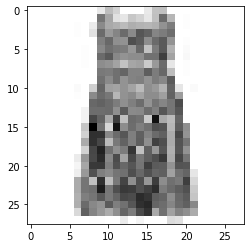

LABEL: 3

MLP classifier (m_training = 500) prediction: [8], true label: 3
MLP classifier (m_training = 10000) prediction: [3], true label: 3


In [54]:
#find the index of a point that is misclassified by best_mlp_classifier_500 and correctly classified by best_mlp_classifier_10000
misclassified_index = None
for idx, (x_t, y_t) in enumerate(zip(X_test, y_test)):
  prediction_NN_500 = best_mlp_classifier_500.predict(x_t.reshape(1, -1))
  prediction_NN_10000 = best_mlp_classifier_10000.predict(x_t.reshape(1, -1))
  if prediction_NN_500 != y_t and prediction_NN_10000 == y_t:
    misclassified_index = idx
    break

#plot the image with the selected index and compare the predictions by the two NNs
if misclassified_index is not None:
  plot_input(X_test, y_test, misclassified_index)
  print(f"\nMLP classifier (m_training = 500) prediction: {prediction_NN_500}, true label: {y_t}")
  print(f"MLP classifier (m_training = 10000) prediction: {prediction_NN_10000}, true label: {y_t}")
else:
  print("No misclassified points found!")

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


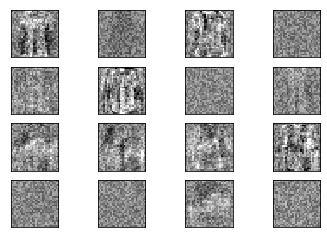

Weights with 10000 data points:


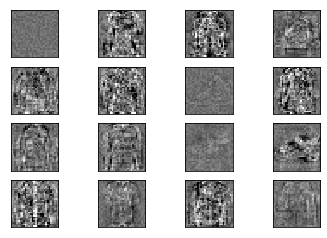

In [55]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_classifier_500.coefs_[0].min(), best_mlp_classifier_500.coefs_[0].max()
for coef, ax in zip(best_mlp_classifier_500.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5*vmin, vmax=.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_classifier_10000.coefs_[0].min(), best_mlp_classifier_10000.coefs_[0].max()
for coef, ax in zip(best_mlp_classifier_10000.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5*vmin, vmax=.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

[ADD YOUR ANSWER HERE]

**ANSWER [David Polzoni]**: In this case, the neural network trained with fewer data samples ($m_{training} = 500$) seems trained to be more specific in its recognition task, compared to the neural network created with a larger number of data samples ($m_{training} = 10000$). This make the weights of the first neural network easier to interpret for the human eye, as (probably) they have been optimized to recognize a more limited number of objects or features. Additionally, the interpretability of a neural network by the human eye also depends on its architecture and the number of layers and units per layer. For example, a neural network with a higher number of layers may be less interpretable than a neural network with a lower number of layers (as in this case).

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET]**

**ANSWER [David Polzoni]**:

**Classifier**: logistic regression model;

**Parameters to set**:
* *penalty*: this parameter specifies the type of regularization to use (for our purposes, the default value for this parameter is fine);
* *C*: key parameter which specifies the inverse of the regularization strength. A smaller value of C means a stronger regularization, which can help to reduce overfitting. This parameter is the one to be optimized using cross-validation;
* *solver*: this parameter specifies the algorithm to use for optimization (for our purposes, the default value for this parameter is fine).

In [56]:
#classifier: logistic regression
#parameter to set: penalty, C, solver

#load the required packages
from sklearn import linear_model
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

#simple filter to ignore ConvergenceWarning (introduced only for 'printing' purposes)
simplefilter("ignore", category=ConvergenceWarning)

#use 5-fold CV to find the best choice of the parameter, than train the model on the entire training set
log_regression_cv = linear_model.LogisticRegressionCV(cv=5, random_state=ID).fit(X_train, y_train)

#compute training and test error for the log_regression model with the optimized parameter
training_error_log_regression_cv = 1. - log_regression_cv.score(X_train, y_train)
test_error_log_regression_cv = 1. - log_regression_cv.score(X_test, y_test)

print('RESULTS FOR OTHER CLASSIFIER (Logistic Regression):\n')

print("Best training error (other model): %f" % training_error_log_regression_cv)
print("Best test error (other model): %f" % test_error_log_regression_cv)

RESULTS FOR OTHER CLASSIFIER (Logistic Regression):

Best training error (other model): 0.087900
Best test error (other model): 0.159680


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

[ADD YOUR ANSWER HERE]

**ANSWER [David Polzoni]**: Based on the results above, it appears that the neural network trained on the larger training set has the lowest test error of the three models. This suggests that this neural network may be the best performing model for this particular classification task. However, logistic regression model is much simpler than a neural network model. In addition, the performance obtained does not differ much from that of the neural network cited above. For this specific task, the best choice, in terms of trade-off between model complexity and performances, is the previously mentioned logistic regression model.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [57]:
#load the required packages
from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN).

In [58]:
#let's consider only 2000 data points
X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state=ID. You can use the default setting for the other parameters.

In [59]:
#KMeans: default settings for other parameters (e.g. algorithm='lloyd')
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)

#fit the model to the data
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=2082157)

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

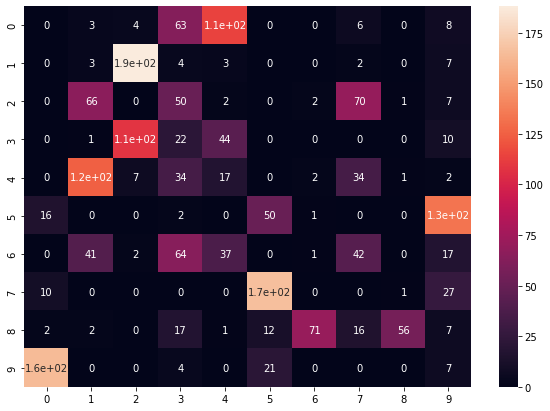

In [60]:
from sklearn.metrics.cluster import contingency_matrix
import seaborn as sn

#compute and print the contingency matrix for the true labels vs the clustering assignments
#use seaborn to plot "nicely" the contingency matrix
cm = contingency_matrix(y_train, kmeans.labels_)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)

## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

[ADD YOUR ANSWER HERE]

**ANSWER [David Polzoni]**: In a contingency matrix, each row corresponds to a true class and each column corresponds to a predicted class. If the clustering algorithm is able to accurately group the observations into clusters that correspond to the true classes, then the elements of the contingency matrix will be mostly on the diagonal, indicating that the true and predicted classes are the same for most observations. However, in this specific case, there are many elements off the diagonal, indicating that the predicted classes do not match the true classes for many observations. This suggests that the clustering algorithm is not performing well in terms of adherence to the true labels.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for $k=2,3,...,15$ (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [61]:
#import silhoutte_score from sklearn.metrics
from sklearn.metrics import silhouette_score

#run k-means with 10 choices of initial centroids for a range of values of n_clusters
list_of_silhouttes = []
for k in range(2, 16):
    kmeans_k = KMeans(n_clusters=k, n_init=10, random_state=ID)
    kmeans_k.fit(X_train)
    silhoutte_score = silhouette_score(X_train, kmeans_k.labels_)
    list_of_silhouttes.append(silhoutte_score)
    print("Silhoutte coefficient for number of clusters="+str(k)+": "+str(silhoutte_score))

Silhoutte coefficient for number of clusters=2: 0.19528765431552908
Silhoutte coefficient for number of clusters=3: 0.19173193790632329
Silhoutte coefficient for number of clusters=4: 0.18987906065269963
Silhoutte coefficient for number of clusters=5: 0.16869861516762905
Silhoutte coefficient for number of clusters=6: 0.1597955091688836
Silhoutte coefficient for number of clusters=7: 0.17039933579401262
Silhoutte coefficient for number of clusters=8: 0.15811723022613663
Silhoutte coefficient for number of clusters=9: 0.14256145235202858
Silhoutte coefficient for number of clusters=10: 0.1475960831426483
Silhoutte coefficient for number of clusters=11: 0.14205719321387736
Silhoutte coefficient for number of clusters=12: 0.14077731069437044
Silhoutte coefficient for number of clusters=13: 0.13449065081223313
Silhoutte coefficient for number of clusters=14: 0.1328616154387225
Silhoutte coefficient for number of clusters=15: 0.12186468475593568


Let us now plot how the silhouette coefficients change with respect to $k$.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

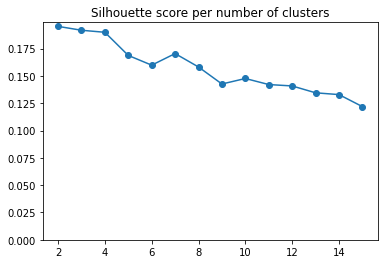

In [62]:
plt.plot([k for k in range(2, 16)], list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

[ADD YOUR ANSWER HERE]

**ANSWER [David Polzoni]**: Based on the silhoutte scores above, it appears that the clustering algorithm is not performing particularly well for this classification task. The scores are relatively low, with the highest score being around 0.195 for $k=2$ clusters. In general, a silhoutte score close to 1 indicates that the clusters are well-separated and each cluster contains similar observations, while a score close to -1 indicates that the clusters are poorly separated and overlap significantly. A score close to 0 indicates that the clusters are neither well separated nor overlapped. The value of k that would give the best performance is $k=2$, as it has the highest silhouette score among all the values of $k$ that were tried. However, this number of clusters is significantly different from the number of true labels in the data. Infact, as we know that there are a specific number of true labels in the data and that number is considerably different from 2 (e.g. in this case, there are 10 true labels in the data), then it may be the case that the silhouette score is not the most appropriate metric to use to evaluate the performance of the clustering algorithm.